**Problem statement 1: predicting turbine energy yield (TEY) using ambient variables as features.**

In [1]:
import pandas as pd

In [2]:
from google.colab import files
uploaded=files.upload()

Saving gas_turbines.csv to gas_turbines.csv


In [3]:
turbine = pd.read_csv("gas_turbines.csv")
turbine

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [4]:
turbine1 =turbine.drop(columns='TEY')
turbine1

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,10.533,6.2494,93.227


In [5]:
def norm(i):
    x=(i-i.min())/(i.max()-i.min())
    return x

In [6]:
x=turbine1.iloc[::,0:3]
x

,AT,AP,AH
0,6.8594,1007.9,96.799
1,6.7850,1008.4,97.118
2,6.8977,1008.8,95.939
3,7.0569,1009.2,95.249
4,7.3978,1009.7,95.150
...,...,...,...
15034,9.0301,1005.6,98.460
15035,7.8879,1005.9,99.093
15036,7.2647,1006.3,99.496
15037,7.0060,1006.8,99.008


In [7]:
X= norm(x)
X

,AT,AP,AH
0,0.184182,0.456050,0.951314
1,0.182020,0.466391,0.955881
2,0.185295,0.474664,0.939003
3,0.189922,0.482937,0.929126
4,0.199830,0.493278,0.927708
...,...,...,...
15034,0.247272,0.408480,0.975092
15035,0.214075,0.414685,0.984153
15036,0.195962,0.422958,0.989922
15037,0.188443,0.433299,0.982936


In [8]:
Y= turbine.iloc[::,7:8:]
Y

,TEY
0,114.70
1,114.72
2,114.71
3,114.72
4,114.72
...,...
15034,111.61
15035,111.78
15036,110.19
15037,110.74


In [9]:
from sklearn.model_selection import train_test_split

In [10]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2)

In [11]:
xtrain

,AT,AP,AH
11013,0.676546,0.381593,0.608194
1781,0.473620,0.360910,0.766863
2934,0.782542,0.476732,0.493716
5853,0.486902,0.551189,0.607879
994,0.110290,0.726991,0.799387
...,...,...,...
3644,0.659340,0.470527,0.753493
13076,0.700523,0.414685,0.439805
13305,0.800678,0.524302,0.389802
12318,0.580867,0.518097,0.830279


In [12]:
import numpy as np

In [13]:
import tensorflow  as tf
import numpy

In [14]:
import math
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredLogarithmicError

In [15]:
hidden_units1 = 200
hidden_units2 = 450
hidden_units3 = 250
learning_rate = 0.01
# Creating model using the Sequential in tensorflow
def build_model_using_sequential():
  model = Sequential([
    Dense(3, kernel_initializer='normal', activation='relu'),
    Dense(hidden_units1, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units2, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units3, kernel_initializer='normal', activation='relu'),
    Dense(1, kernel_initializer='normal', activation='linear')
  ])
  return model
# build the model
model = build_model_using_sequential()

In [16]:
# loss function
msle = MeanSquaredLogarithmicError()
model.compile(
    loss=msle,
    optimizer=Adam(learning_rate=learning_rate),
    metrics=[msle]
)
# train the model
history = model.fit(
    xtrain,
    ytrain,
    epochs=20,
    batch_size=64,
    validation_split=0.2
)

Epoch 1/20
151/151 [==============================] - 3s 12ms/step - loss: 0.6677 - mean_squared_logarithmic_error: 0.6650 - val_loss: 0.0142 - val_mean_squared_logarithmic_error: 0.0142
Epoch 2/20
151/151 [==============================] - 3s 17ms/step - loss: 0.0174 - mean_squared_logarithmic_error: 0.0175 - val_loss: 0.0142 - val_mean_squared_logarithmic_error: 0.0142
Epoch 3/20
151/151 [==============================] - 2s 14ms/step - loss: 0.0172 - mean_squared_logarithmic_error: 0.0171 - val_loss: 0.0140 - val_mean_squared_logarithmic_error: 0.0140
Epoch 4/20
151/151 [==============================] - 1s 9ms/step - loss: 0.0169 - mean_squared_logarithmic_error: 0.0169 - val_loss: 0.0140 - val_mean_squared_logarithmic_error: 0.0140
Epoch 5/20
151/151 [==============================] - 1s 9ms/step - loss: 0.0165 - mean_squared_logarithmic_error: 0.0165 - val_loss: 0.0135 - val_mean_squared_logarithmic_error: 0.0135
Epoch 6/20
151/151 [==============================] - 1s 9ms/step -

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 12        
                                                                 
 dense_1 (Dense)             (None, 200)               800       
                                                                 
 dropout (Dropout)           (None, 200)               0         
                                                                 
 dense_2 (Dense)             (None, 450)               90450     
                                                                 
 dropout_1 (Dropout)         (None, 450)               0         
                                                                 
 dense_3 (Dense)             (None, 250)               112750    
                                                                 
 dense_4 (Dense)             (None, 1)                 2

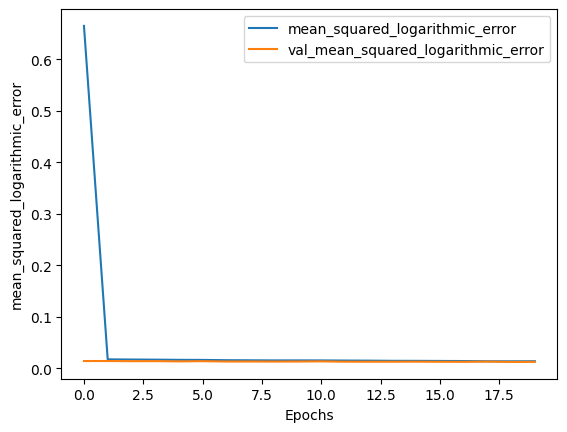

In [21]:
def plot_history(history, key):
  plt.plot(history.history[key])
  plt.plot(history.history['val_'+key])
  plt.xlabel("Epochs")
  plt.ylabel(key)
  plt.legend([key, 'val_'+key])
  plt.show()
# Plot the history
plot_history(history, 'mean_squared_logarithmic_error')

In [ ]:
#Hence as epochs are increasing loss decreases

In [22]:
#Predicting the test data
ypred = model.predict(xtest)

94/94 [==============================] - 0s 2ms/step


In [23]:
ypred

array([[126.26705],
       [129.73581],
       [128.13686],
       ...,
       [143.31432],
       [126.96391],
       [126.14633]], dtype=float32)

In [24]:
ypred.shape

(3008, 1)

In [25]:
from sklearn.metrics import mean_squared_log_error

In [26]:
mean_squared_log_error(ytest,ypred)

0.01259641757551959

**Problem statement 2: PREDICT THE BURNED AREA OF FOREST FIRES WITH NEURAL NETWORKS**

In [27]:
from google.colab import files
uploaded=files.upload()

Saving forestfires.csv to forestfires.csv


In [28]:
forestfire = pd.read_csv("forestfires.csv")
forestfire

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [29]:
forestfire= forestfire.drop(columns=['month','day'])

In [30]:
forestfire

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,1,0,0,0,0,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,large
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,large
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,large
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,small


In [31]:
from sklearn import preprocessing

In [32]:
label_encoder = preprocessing.LabelEncoder()

In [33]:
forestfire['size_category']=label_encoder.fit_transform(forestfire.size_category)

In [34]:
forestfire

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,1,0,0,0,0,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,1,0,0,0,0,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,0
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,1


In [35]:
x= forestfire.iloc[::,0:28:]
x

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,0,1,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,0,1,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,0,1,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,0,1,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,0
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
y= forestfire.iloc[::,28:29:]
y

,size_category
0,1
1,1
2,1
3,1
4,1
...,...
512,0
513,0
514,0
515,1


In [37]:
x_train, x_test, y_train,y_test = train_test_split(x,y,test_size=0.2)
x_train

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
505,91.0,163.2,744.4,10.1,26.7,35,1.8,0.0,5.80,0,...,0,0,0,0,0,0,0,0,0,0
82,94.8,108.3,647.1,17.0,18.6,51,4.5,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,0
86,92.9,137.0,706.4,9.2,25.4,27,2.2,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,1
57,92.6,46.5,691.8,8.8,13.8,50,2.7,0.0,0.00,0,...,0,0,0,0,0,0,0,0,1,0
29,93.5,149.3,728.6,8.1,22.8,39,3.6,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13,90.9,126.5,686.5,7.0,21.3,42,2.2,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,1
247,92.2,91.6,503.6,9.6,20.7,70,2.2,0.0,0.75,0,...,0,0,0,0,0,0,0,0,0,0
265,93.7,102.2,550.3,14.6,22.1,54,7.6,0.0,0.79,0,...,0,0,0,0,0,0,0,0,0,0
274,84.0,27.8,354.6,5.3,5.1,61,8.0,0.0,11.19,0,...,1,0,0,0,0,0,0,0,0,0


In [38]:
y_train

,size_category
505,1
82,1
86,1
57,1
29,1
...,...
13,1
247,1
265,1
274,0


In [39]:
# create model
model2 = tf.keras.models.Sequential()
model2.add(tf.keras.layers.Dense(80, input_dim=28, activation='sigmoid'))
model2.add(tf.keras.layers.Dense(100,  activation='relu'))
model2.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [40]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 80)                2320      
                                                                 
 dense_6 (Dense)             (None, 100)               8100      
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 10521 (41.10 KB)
Trainable params: 10521 (41.10 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [41]:
# Compile model
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [42]:
# Fit the model
history=model2.fit(x, y, validation_split=0.20, epochs=10, batch_size=100)

Epoch 1/10
5/5 [==============================] - 1s 57ms/step - loss: 0.6148 - accuracy: 0.6683 - val_loss: 0.6160 - val_accuracy: 0.7019
Epoch 2/10
5/5 [==============================] - 0s 11ms/step - loss: 0.5773 - accuracy: 0.7409 - val_loss: 0.6078 - val_accuracy: 0.7019
Epoch 3/10
5/5 [==============================] - 0s 15ms/step - loss: 0.5578 - accuracy: 0.7409 - val_loss: 0.5716 - val_accuracy: 0.7115
Epoch 4/10
5/5 [==============================] - 0s 16ms/step - loss: 0.5458 - accuracy: 0.7409 - val_loss: 0.5710 - val_accuracy: 0.7308
Epoch 5/10
5/5 [==============================] - 0s 15ms/step - loss: 0.5349 - accuracy: 0.7433 - val_loss: 0.5650 - val_accuracy: 0.7212
Epoch 6/10
5/5 [==============================] - 0s 11ms/step - loss: 0.5247 - accuracy: 0.7409 - val_loss: 0.5651 - val_accuracy: 0.7212
Epoch 7/10
5/5 [==============================] - 0s 11ms/step - loss: 0.5203 - accuracy: 0.7409 - val_loss: 0.5577 - val_accuracy: 0.7212
Epoch 8/10
5/5 [===========

In [45]:
# evaluate the model
scores = model2.evaluate(x, y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

17/17 [==============================] - 0s 3ms/step - loss: 0.4995 - accuracy: 0.7485
mean_squared_logarithmic_error: 74.85%


In [46]:
# Visualize training history

# list all data in history
model.history.history.keys()
import matplotlib.pyplot as plt

In [47]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

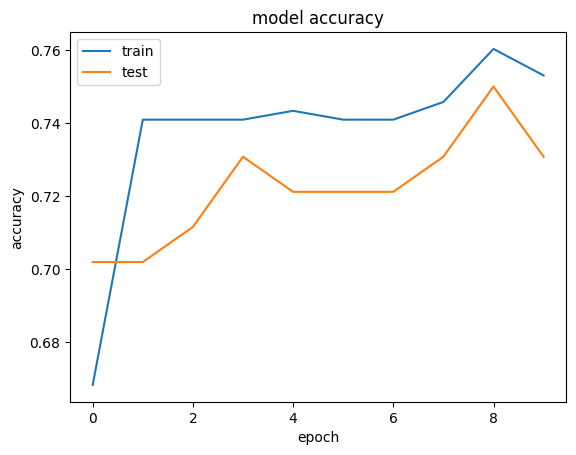

In [48]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [ ]:
#hence test accuracy is in good range as like of train accuracy for epoch between 0 to 8